In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

image_path = cv2.imread("/content/download.jpg")
image = cv2.cvtColor(image_path , cv2.COLOR_BGR2RGB)

##IMage-BRIGTNESS + image_brightness_roi

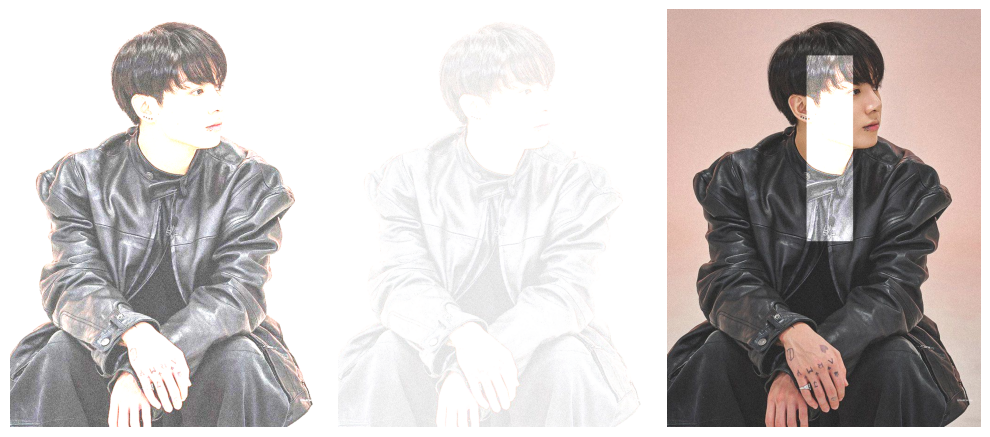

In [3]:
img4 = image.copy()
diffuse_factor = 0.0098
diffuse_image = np.clip(img4 * diffuse_factor , 0 , 1)

img5 = image.copy()
bgf = 3
bright_roi = (100 , 500 , 300 , 400 )
img5[bright_roi[0]:bright_roi[1] , bright_roi[2]:bright_roi[3]] = cv2.convertScaleAbs(img5[bright_roi[0]:bright_roi[1] , bright_roi[2]:bright_roi[3]] , alpha = bgf)


img3 = image.copy()
brigtness_factor  = 190
image_bright = np.clip(img3.astype(np.int16) + brigtness_factor ,  0 , 255).astype(np.uint8)






plt.figure(figsize = (10 , 5))
plt.subplot(1 , 3 , 1)
plt.imshow(diffuse_image)
plt.axis("off")



plt.subplot(1 , 3 , 2)
plt.imshow(image_bright)
plt.axis("off")




plt.subplot(1  ,3 , 3)
plt.imshow(img5)
plt.axis("off")

plt.tight_layout()
plt.show()

Image-- Resize , Rotate , Crop , shrink , translate

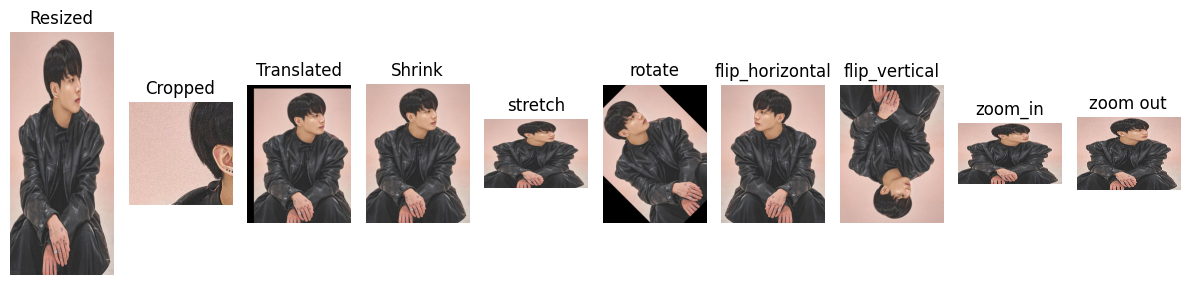

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assume 'image' is already read using cv2.imread()
img1 = image.copy()
image_resize = cv2.resize(img1, (1024, 2404))  # Resize

# Crop image using slicing [y1:y2, x1:x2]
img2 = image.copy()
image_crop = img2[100:300, 100:300]  # Crop from (x=100, y=100) to (x=300, y=300)

# Translate image using warpAffine
img0 = image.copy()
tx, ty = 45, 23
translate_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(img0, translate_matrix, (img0.shape[1], img0.shape[0]))

# Convert BGR to RGB for matplotlib





# 1. Resize (Shrink & Stretch)
resize_shrink = cv2.resize(image, (int(image.shape[1] * 0.5), int(image.shape[0] * 0.5)))  # Shrink by 50%
resize_stretch = cv2.resize(image, (image.shape[1] * 2, image.shape[0]))  # Stretch width x2



# 4. Rotate
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
angle = 45  # degrees
scale = 1.0
rotate_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotate_image = cv2.warpAffine(image, rotate_matrix, (w, h))




flip_horizontal = cv2.flip(image, 1)  # Flip horizontally
flip_vertical = cv2.flip(image, 0)    # Flip vertically


zoom_in = cv2.resize(image, None, fx=36.0, fy=16.0, interpolation=cv2.INTER_LINEAR)

# --- ZOOM OUT ---
zoom_out = cv2.resize(image, None, fx=8.5, fy=4.5, interpolation=cv2.INTER_AREA)


# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 10, 1)
plt.imshow(image_resize)
plt.title("Resized")
plt.axis("off")

plt.subplot(1, 10, 2)
plt.imshow(image_crop)
plt.title("Cropped")
plt.axis("off")

plt.subplot(1, 10, 3)
plt.imshow(translated_image)
plt.title("Translated")
plt.axis("off")



plt.subplot(1, 10, 4)
plt.imshow(resize_shrink)
plt.title("Shrink")
plt.axis("off")


plt.subplot(1, 10, 5)
plt.imshow(resize_stretch)
plt.title("stretch")
plt.axis("off")


plt.subplot(1, 10, 6)
plt.imshow(rotate_image)
plt.title("rotate")
plt.axis("off")



plt.subplot(1, 10, 7)
plt.imshow(flip_horizontal)
plt.title("flip_horizontal")
plt.axis("off")



plt.subplot(1, 10, 8)
plt.imshow(flip_vertical)
plt.title("flip_vertical")
plt.axis("off")



plt.subplot(1, 10, 9)
plt.imshow(zoom_in)
plt.title("zoom_in")
plt.axis("off")


plt.subplot(1, 10, 10)
plt.imshow(zoom_out)
plt.title("zoom out")
plt.axis("off")


plt.tight_layout()
plt.show()


##NOise , diffusion ,

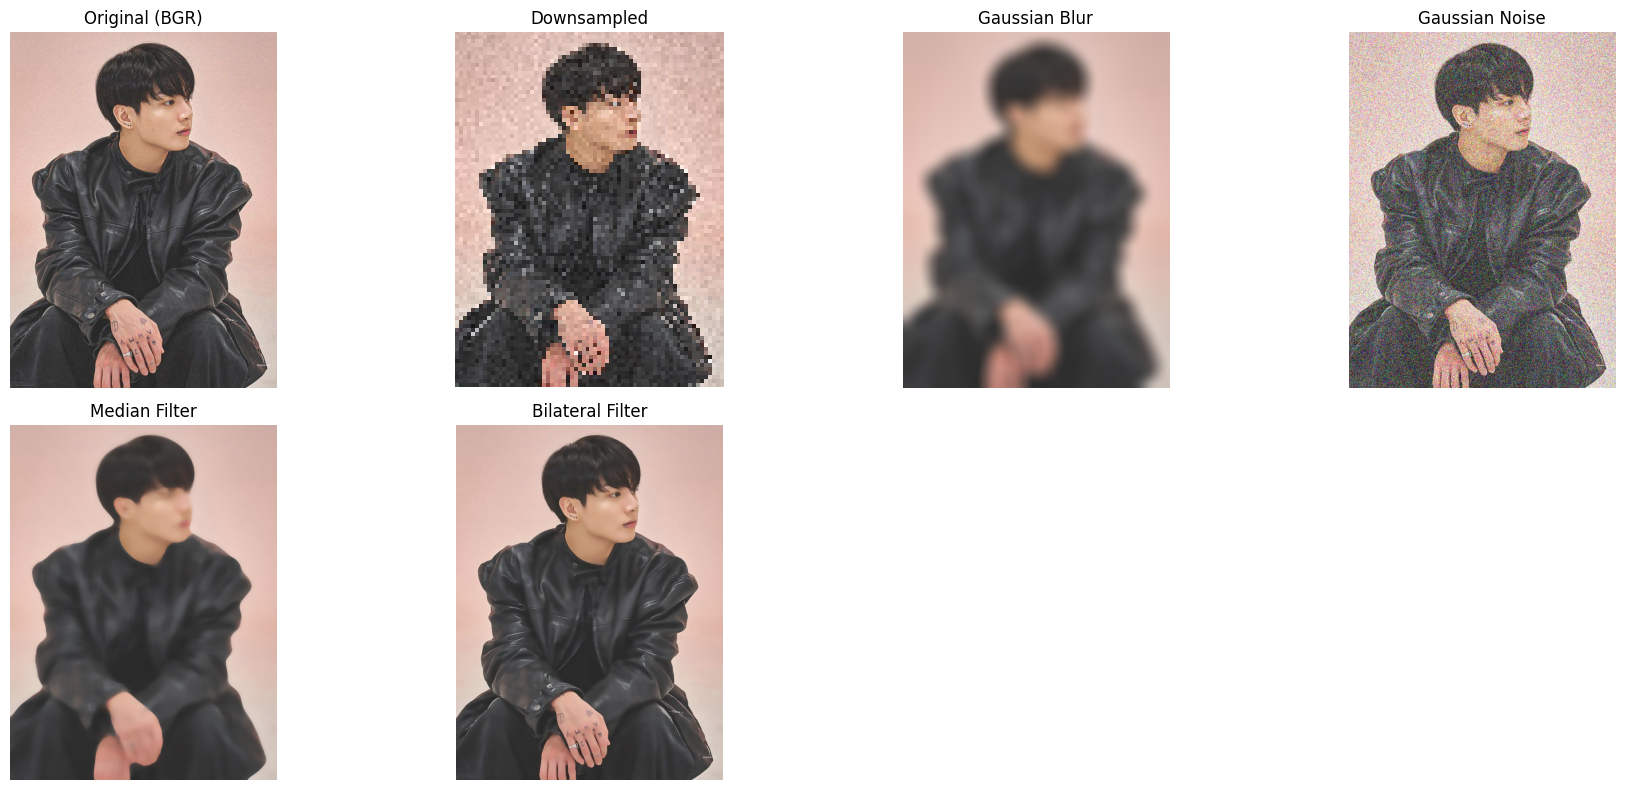

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = cv2.imread("/content/download.jpg")
image = cv2.cvtColor(image_path , cv2.COLOR_BGR2RGB)

# 1. Downsample (skip pixels)
downsample_factor = 10
downsample_image = image[::downsample_factor, ::downsample_factor]

# 2. Gaussian Blur
blur_image = cv2.GaussianBlur(image, (51, 51), 20)

# 3. Add Gaussian Noise
img_float = image.astype(np.float32)
mean = 21
stddev = 64
noise = np.random.normal(mean, stddev, img_float.shape).astype(np.float32)
noisy_image = img_float + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# 4. Median Filter
median_filter = cv2.medianBlur(image, 23)

# 5. Bilateral Filter
bilateral = cv2.bilateralFilter(image, d=15, sigmaColor=75, sigmaSpace=75)

# 📊 Plotting
plt.figure(figsize=(18, 8))

images = [
    ("Original (BGR)", image),
    ("Downsampled", downsample_image),
    ("Gaussian Blur", blur_image),
    ("Gaussian Noise", noisy_image),
    ("Median Filter", median_filter),
    ("Bilateral Filter", bilateral)
]

for i, (title, img) in enumerate(images):
    plt.subplot(2, 4, i + 1)



    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


##PADDED IMAGES

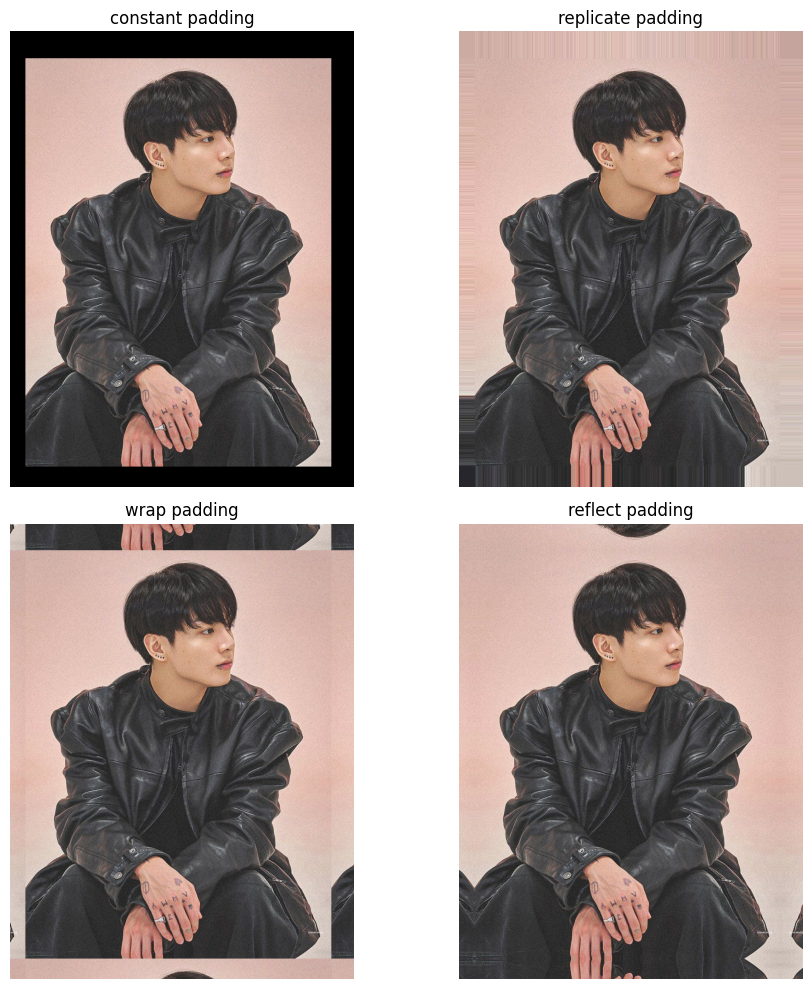

In [29]:
image_16 = image.copy()  # Corrected: use parentheses

padding_modes = [cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_WRAP, cv2.BORDER_REFLECT]
padding_names = ["constant", "replicate", "wrap", "reflect"]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, mode in enumerate(padding_modes):
    padded_image = cv2.copyMakeBorder(image_16, 60, 45, 34, 50, mode)
    ax = axes[i // 2, i % 2]
    ax.imshow(padded_image)
    ax.set_title(f"{padding_names[i]} padding")
    ax.axis("off")

plt.tight_layout()
plt.show()


##ZOOM-IN AND ZOOM--OUT

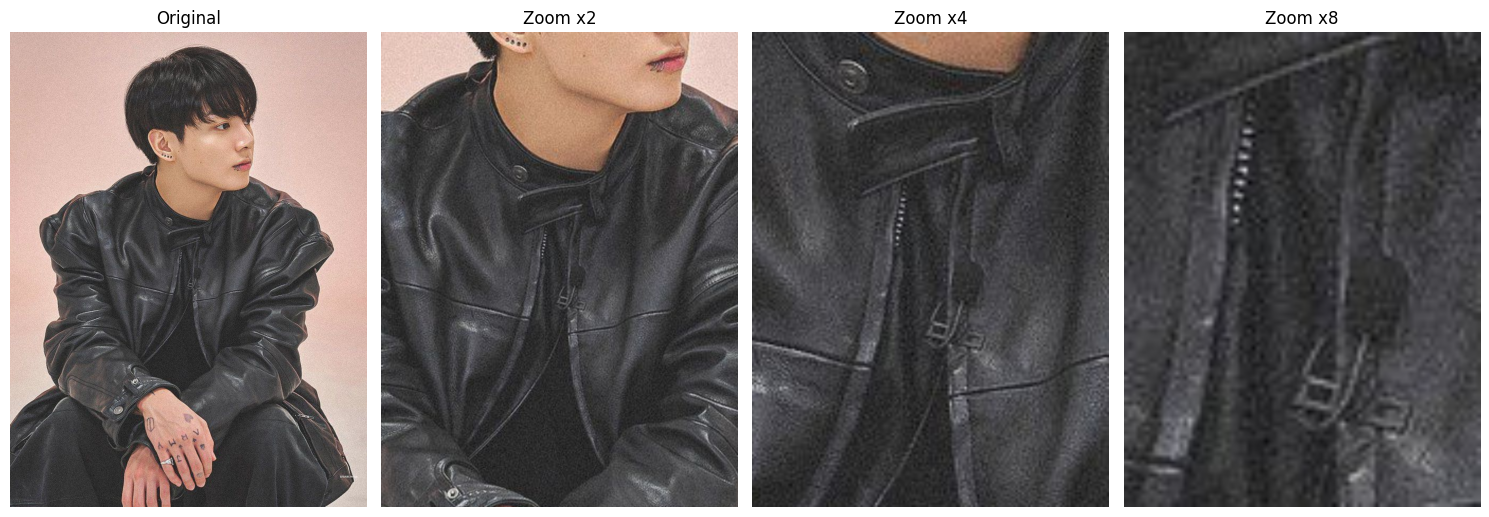

In [30]:
import cv2
import matplotlib.pyplot as plt

# Load and convert image to RGB
img1 = image.copy()
h, w, _ = img1.shape



# Step 1: Crop center
def crop_center(img, scale):
    h, w = img.shape[:2]
    new_h, new_w = h // scale, w // scale
    startx = w // 2 - new_w // 2
    starty = h // 2 - new_h // 2
    return img[starty:starty+new_h, startx:startx+new_w]

#w//2 and h//2 is the exact center point of the full image.

#But you need the top-left corner of the cropped box.

#So you move left and up by half of your new crop size → new_w//2, new_h//2.




# Step 2: Crop and Resize
zoom2 = cv2.resize(crop_center(img1, 2), (w, h), interpolation=cv2.INTER_LINEAR)
zoom4 = cv2.resize(crop_center(img1, 4), (w, h), interpolation=cv2.INTER_LINEAR)
zoom8 = cv2.resize(crop_center(img1, 8), (w, h), interpolation=cv2.INTER_LINEAR)

# Plot all
plt.figure(figsize=(15, 8))

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img1)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Zoom x2")
plt.imshow(zoom2)
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Zoom x4")
plt.imshow(zoom4)
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Zoom x8")
plt.imshow(zoom8)
plt.axis("off")

plt.tight_layout()
plt.show()


##DEBLURRING

In [31]:
# ✅ Load generator and set to eval


import cv2
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms  # Ensure this import is present



import pandas as pd
from PIL import Image
from tqdm import tqdm
from torch.utils.data import Dataset , DataLoader
import matplotlib.pyplot as plt
from torchvision.models import vgg19
import random

device = "cuda" if torch.cuda.is_available() else "cpu"


class vggL(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg = vgg19(pretrained=True).features[:25].eval().to(device)
        self.loss = nn.MSELoss()

    def forward(self, first, second):
        vgg_first = self.vgg(first)
        vgg_second = self.vgg(second)
        perceptual_loss = self.loss(vgg_first, vgg_second)
        return perceptual_loss






class ConvBlock(nn.Module):
    # Conv -> BN -> leakyReLU
    def __init__(
            self,
            in_channels,
            out_channels,
            use_activation=True,
            use_BatchNorm=True,
            **kwargs
    ):

        super().__init__()
        self.use_activation = use_activation
        self.cnn = nn.Conv2d(in_channels, out_channels, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels) if use_BatchNorm else nn.Identity()
        self.ac = (
            nn.LeakyReLU(0.2, inplace=True)
        )

    def forward(self, x):
        x1 = self.cnn(x)
        x2 = self.bn(x1)
        x3 = self.ac(x2)
        return x3 if self.use_activation else x2


class UpsampleBlock(nn.Module):
    def __init__(self, in_channels, scale_factor):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, in_channels * scale_factor ** 2, 2, 1, 1)
        self.ps = nn.PixelShuffle(scale_factor)
        self.ac = nn.PReLU(num_parameters=in_channels)

    def forward(self, x):
        return self.ac(self.ps(self.conv(x)))


class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.b1 = ConvBlock(
            in_channels,
            in_channels,
            kernel_size=3,
            stride=1,
            padding=1
        )

        self.b2 = ConvBlock(
            in_channels,
            in_channels,
            kernel_size=3,
            stride=1,
            padding=1,
            use_activation=False
        )

    def forward(self, x):
        out = self.b1(x)
        out = self.b2(out)
        return out + x


class Generator(nn.Module):
    def __init__(self, in_channels=3, num_channels=64, num_blocks=8):
        super().__init__()
        self.initial = ConvBlock(in_channels, num_channels, kernel_size=7, stride=1, padding=4, use_BatchNorm=False)
        self.res = nn.Sequential(*[ResidualBlock(num_channels) for i in range(num_blocks)])
        self.conv = ConvBlock(num_channels, num_channels, kernel_size=3, stride=1, padding=1, use_activation=False)
        self.up = nn.Sequential(UpsampleBlock(num_channels, scale_factor=2))
        self.final = nn.Conv2d(num_channels, in_channels, kernel_size=9, stride=1, padding=1)

    def forward(self, x):
        x = self.initial(x)
        c = self.res(x)
        c = self.conv(c) + x
        c = self.up(c)
        return torch.sigmoid(self.final(c))


gen = Generator().to(device)
gen.load_state_dict(torch.load("/content/generator_srgan.pth", map_location=device))
gen.eval()


# ✅ Define transform (resize to match training input)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# ✅ Test folder
test_folder = "/content/test"
test_images = os.listdir(test_folder)

# ✅ Loop over test images
for img_file in test_images:
    img_path = os.path.join(test_folder, img_file)

    # Load and preprocess image
    input_image = Image.open(img_path).convert("RGB")
    low_res = transform(input_image).unsqueeze(0).to(device)  # add batch dim

    # Predict high-res
    with torch.no_grad():
        fake_high_res = gen(low_res)

    # Move tensors to CPU and convert to image format
    input_np = low_res.squeeze(0).cpu().permute(1, 2, 0).numpy()
    output_np = fake_high_res.squeeze(0).cpu().permute(1, 2, 0).numpy()

    # Plot side-by-side
    plt.figure(figsize=(8, 4))
    plt.suptitle(f"File: {img_file}", fontsize=14)

    plt.subplot(1, 2, 1)
    plt.title("Low-Res Input")
    plt.imshow(input_np)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Predicted High-Res")
    plt.imshow(output_np)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

##CONTOUSSS

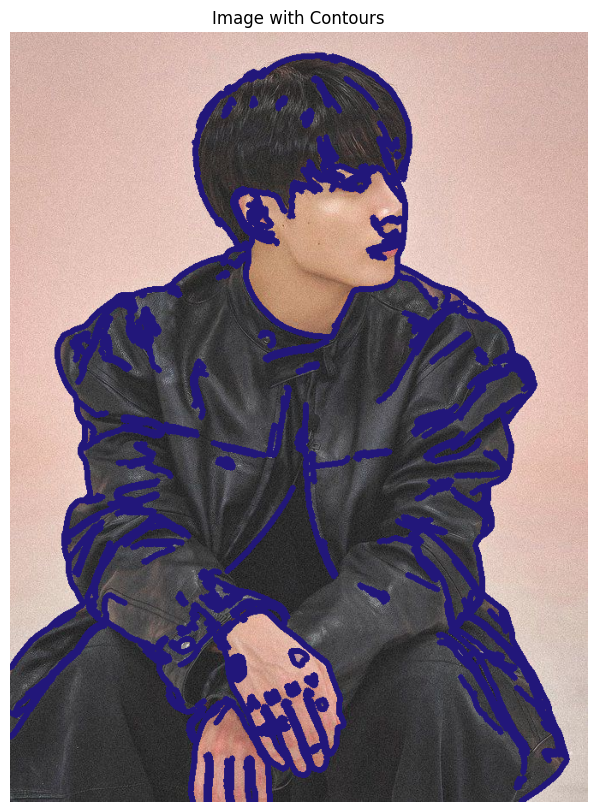

In [34]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/download.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (122 , 23 , 34), 6)

# Convert BGR to RGB for displaying with matplotlib
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

# Show the image with contours
plt.figure(figsize=(10, 10))
plt.imshow(contour_image_rgb)
plt.title("Image with Contours")
plt.axis('off')
plt.show()

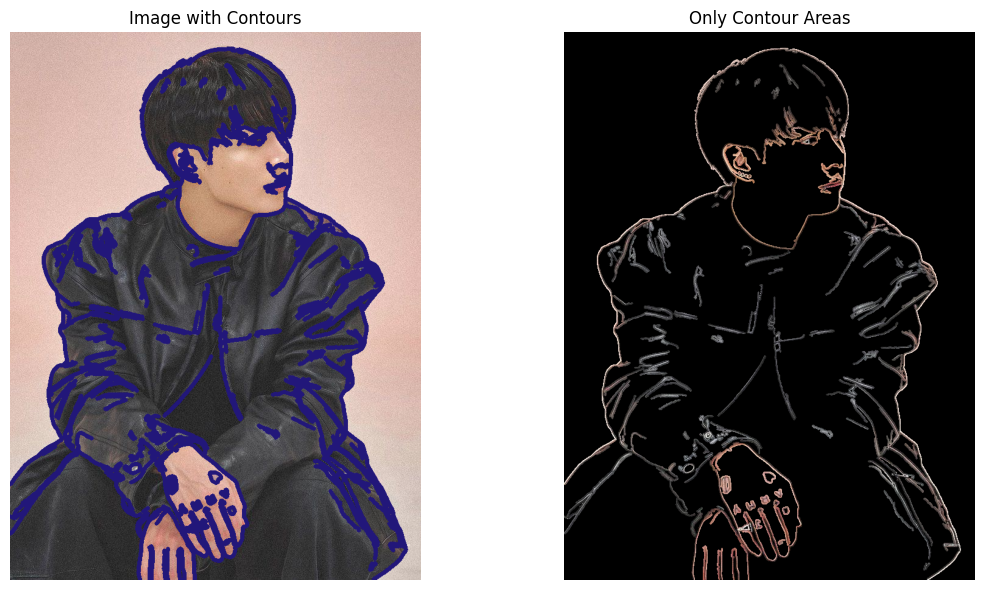

In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/download.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (122, 23, 34), 6)

# -----------------------------
# ✅ Create a mask with contours filled
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, color=(255 , 255 , 255), thickness=2)

# Apply mask to the original image
only_contours = cv2.bitwise_and(image, image, mask=mask)

# Convert both images to RGB for plotting
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
only_contours_rgb = cv2.cvtColor(only_contours, cv2.COLOR_BGR2RGB)

# -----------------------------
# ✅ Plot both images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(contour_image_rgb)
plt.title("Image with Contours")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(only_contours_rgb)
plt.title("Only Contour Areas")
plt.axis('off')

plt.tight_layout()
plt.show()


##BACKGROUND__REMOVER

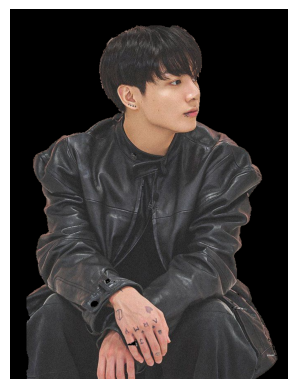

In [41]:
image_path = cv2.imread("/content/download.jpg")
image = cv2.cvtColor(image_path , cv2.COLOR_BGR2RGB)

mask = np.zeros(image.shape[:2] , np.uint8)
bgm_model = np.zeros((1 , 65) , np.float64)
fgm_model = np.zeros((1 , 65) , np.float64)



rect = (40 , 40 , image.shape[1] - 40 , image.shape[0] -40)

cv2.grabCut(image  , mask , rect , bgm_model , fgm_model , 5 , cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0) ,  0 , 1).astype("uint8")

result = image * mask2 [: , : , np.newaxis]


plt.imshow(result)
plt.axis("off")
plt.show()

##EDGY__DETECTIONs

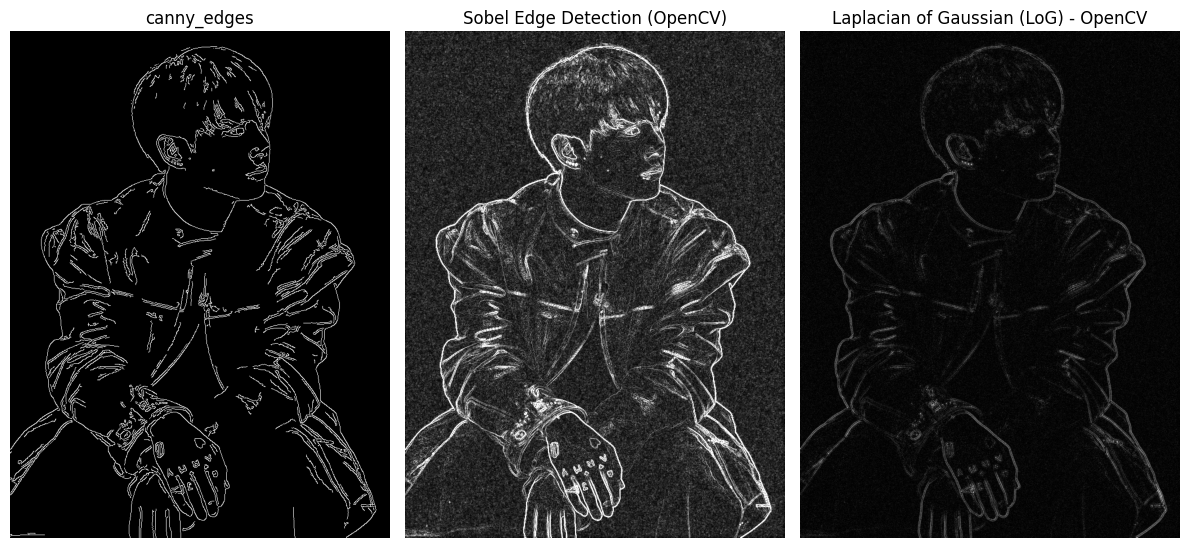

In [54]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread("/content/download.jpg", cv2.IMREAD_GRAYSCALE)


img34= img.copy()
img_blur = cv2.GaussianBlur(img34, (5, 5), 1)
imgs = cv2.Canny(img_blur, 50, 100)


# Apply Sobel operator (x and y direction)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Gx
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Gy

# Compute gradient magnitude
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)

img1 = img.copy()
# Step 1: Gaussian blur
blur = cv2.GaussianBlur(img1, (5, 5), sigmaX=1)



# Step 2: Apply Laplacian
laplacian = cv2.Laplacian(blur, cv2.CV_64F)

# Convert to absolute values and 8-bit
laplacian = cv2.convertScaleAbs(laplacian)

plt.figure(figsize=(12, 6))

plt.subplot(1 , 3 , 1)
plt.imshow(imgs , cmap = 'gray')
plt.title("canny_edges")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(sobel, cmap='gray')
plt.title("Sobel Edge Detection (OpenCV)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian of Gaussian (LoG) - OpenCV")
plt.axis("off")



plt.tight_layout()
plt.show()




##COLORING AND ALL

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Method 1: Basic Edge Detection Sketch
def edge_sketch(image_path):
    # Read image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection using Canny
    edges = cv2.Canny(blur, 50, 150)

    # Invert colors (black lines on white background)
    sketch = cv2.bitwise_not(edges)

    return sketch

# Method 2: Pencil Sketch using Dodge Blend
def pencil_sketch(image_path):
    # Read image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Invert the grayscale image
    inverted = cv2.bitwise_not(gray)

    # Apply Gaussian blur to inverted image
    blurred = cv2.GaussianBlur(inverted, (111, 111), 0)

    # Create sketch by dividing gray by inverted blurred image
    sketch = cv2.divide(gray, 255 - blurred, scale=256)

    #This line is at the heart of the "Dodge Blend" technique, which mimics the pencil sketch effect by brightening certain parts of the image and keeping strong contrasts for lines.



    return sketch


# Method 3: Advanced Pencil Sketch with Color
def colored_pencil_sketch(image_path):
    # Read image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Create pencil sketch
    inverted = cv2.bitwise_not(gray)
    blurred = cv2.GaussianBlur(inverted, (111, 111), 0)
    pencil_gray = cv2.divide(gray, 255 - blurred, scale=256)

    # Convert back to 3 channels
    pencil_color = cv2.cvtColor(pencil_gray, cv2.COLOR_GRAY2BGR)

    # Blend with original image for colored effect
    result = cv2.addWeighted(img, 0.3, pencil_color, 0.7, 0)
    #cv2.addWeighted(src1, alpha, src2, beta, gamma)

    #This line blends two images together using weighted addition. It’s a common technique in OpenCV to mix or overlay two images.

    return result, pencil_gray

# Method 4: Stylized Sketch using Bilateral Filter
def stylized_sketch(image_path):
    # Read image
    img = cv2.imread(image_path)

    # Apply bilateral filter to reduce noise while keeping edges
    bilateral = cv2.bilateralFilter(img, 9, 200, 200)

    # Convert to grayscale
    gray = cv2.cvtColor(bilateral, cv2.COLOR_BGR2GRAY)

    # Apply median blur
    blur = cv2.medianBlur(gray, 5)

    # Create edges using adaptive threshold
    edges = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)

    # Convert back to color and combine with bilateral filtered image
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    cartoon = cv2.bitwise_and(bilateral, edges_colored)

    return cartoon

# Method 5: Charcoal Sketch Effect
def charcoal_sketch(image_path):
    # Read image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect edges using Laplacian
    edges = cv2.Laplacian(blur, cv2.CV_8U, ksize=5)

    # Apply threshold to get binary image
    _, thresh = cv2.threshold(edges, 70, 255, cv2.THRESH_BINARY_INV)

    # Apply morphological operations for charcoal effect
    kernel = np.ones((2, 2), np.uint8)
    charcoal = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    return charcoal

# Method 6: Detailed Line Art
def line_art(image_path):
    # Read image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Sobel operators for edge detection
    sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate gradient magnitude
    magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Normalize and convert to uint8
    magnitude = np.uint8(magnitude / magnitude.max() * 255)

    # Invert for black lines on white background
    line_art_img = cv2.bitwise_not(magnitude)

    return line_art_img

# Method 7: Watercolor Effect
def watercolor_sketch(image_path):
    # Read image
    img = cv2.imread(image_path)

    # Resize for faster processing
    height, width = img.shape[:2]
    img = cv2.resize(img, (width//2, height//2))

    # Apply bilateral filter multiple times
    for _ in range(3):
        img = cv2.bilateralFilter(img, 9, 200, 200)

    # Resize back
    img = cv2.resize(img, (width, height))

    # Convert to grayscale for edge detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 23, 23)

    # Convert edges to 3-channel
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Combine with bilateral filtered image
    watercolor = cv2.bitwise_and(img, edges)

    return watercolor

# Function to display images in Colab using matplotlib
def display_results(original_path, results_dict):
    """Display original and all sketch results in a grid"""

    # Read original image
    original = cv2.imread(original_path)
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    # Create subplot grid
    num_methods = len(results_dict) + 1  # +1 for original
    cols = 3
    rows = (num_methods + cols - 1) // cols

    plt.figure(figsize=(15, 5 * rows))

    # Display original
    plt.subplot(rows, cols, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Display each sketch method
    for i, (method_name, result) in enumerate(results_dict.items(), 2):
        plt.subplot(rows, cols, i)

        # Handle both grayscale and color images
        if len(result.shape) == 3:
            # Color image - convert BGR to RGB for matplotlib
            result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
            plt.imshow(result_rgb)
        else:
            # Grayscale image
            plt.imshow(result, cmap='gray')

        plt.title(method_name)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function - FIXED VERSION for Colab
def main():
    image_path = "/content/download.jpg"  # Your image path

    # Check if image exists
    import os
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        print("Please upload your image to Colab first!")
        return

    print("Processing image with all methods...")

    # Create results dictionary
    results = {}

    try:
        # Method 1: Edge Sketch
        print("Processing: Edge Sketch...")
        edge_result = edge_sketch(image_path)
        cv2.imwrite("/content/edge_sketch.jpg", edge_result)
        results['Edge Sketch'] = edge_result

        # Method 2: Pencil Sketch
        print("Processing: Pencil Sketch...")
        pencil_result = pencil_sketch(image_path)
        cv2.imwrite("/content/pencil_sketch.jpg", pencil_result)
        results['Pencil Sketch'] = pencil_result

        # Method 3: Colored Pencil Sketch
        print("Processing: Colored Pencil Sketch...")
        colored_result, gray_result = colored_pencil_sketch(image_path)
        cv2.imwrite("/content/colored_pencil_sketch.jpg", colored_result)
        cv2.imwrite("/content/gray_pencil_sketch.jpg", gray_result)
        results['Colored Pencil'] = colored_result
        results['Gray Pencil'] = gray_result

        # Method 4: Stylized Sketch
        print("Processing: Stylized Sketch...")
        stylized_result = stylized_sketch(image_path)
        cv2.imwrite("/content/stylized_sketch.jpg", stylized_result)
        results['Stylized Sketch'] = stylized_result

        # Method 5: Charcoal Sketch
        print("Processing: Charcoal Sketch...")
        charcoal_result = charcoal_sketch(image_path)
        cv2.imwrite("/content/charcoal_sketch.jpg", charcoal_result)
        results['Charcoal Sketch'] = charcoal_result

        # Method 6: Line Art
        print("Processing: Line Art...")
        line_result = line_art(image_path)
        cv2.imwrite("/content/line_art.jpg", line_result)
        results['Line Art'] = line_result

        # Method 7: Watercolor
        print("Processing: Watercolor...")
        watercolor_result = watercolor_sketch(image_path)
        cv2.imwrite("/content/watercolor_sketch.jpg", watercolor_result)
        results['Watercolor'] = watercolor_result

        print("✅ All sketches generated and saved successfully!")
        print("\nSaved files:")
        print("- /content/edge_sketch.jpg")
        print("- /content/pencil_sketch.jpg")
        print("- /content/colored_pencil_sketch.jpg")
        print("- /content/gray_pencil_sketch.jpg")
        print("- /content/stylized_sketch.jpg")
        print("- /content/charcoal_sketch.jpg")
        print("- /content/line_art.jpg")
        print("- /content/watercolor_sketch.jpg")

        # Display all results
        display_results(image_path, results)

    except Exception as e:
        print(f"Error processing image: {str(e)}")

# Simple usage example - FIXED for Colab
def simple_sketch_colab(image_path):
    """
    Simplest photosketching function for Colab
    """
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Could not load image from {image_path}")
            return None

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Canny(blur, 50, 150)
        sketch = cv2.bitwise_not(edges)

        # Save the result
        output_path = "/content/simple_sketch.jpg"
        cv2.imwrite(output_path, sketch)
        print(f"Sketch saved to: {output_path}")

        # Display using matplotlib
        plt.figure(figsize=(12, 5))

        # Original
        plt.subplot(1, 2, 1)
        original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(original_rgb)
        plt.title('Original Image')
        plt.axis('off')

        # Sketch
        plt.subplot(1, 2, 2)
        plt.imshow(sketch, cmap='gray')
        plt.title('Simple Sketch')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        return sketch

    except Exception as e:
        print(f"Error: {str(e)}")
        return None

# Run the code
if __name__ == "__main__":
    # Upload your image first, then run this

    # Option 1: Run all methods
    main()

    # Option 2: Run simple sketch only
    # simple_sketch_colab("/content/download.jpg")



Output hidden; open in https://colab.research.google.com to view.

##face__recongition__and implementatioon

In [ ]:
!pip install insightface
!pip install opencv-python
!pip install numpy
!pip install onnxruntime

In [ ]:
import cv2
import numpy as np
import os
import insightface
from insightface.app import FaceAnalysis
import pickle
import math

# ---------- Blur function ----------
def blur(input_image, kernel_size, gamma, face_location):
    """Apply Gaussian blur to a face region with elliptical mask"""
    x, y, w, h = face_location
    mask = np.zeros(input_image.shape[:2], dtype=np.uint8)
    padding = 20
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(input_image.shape[1] - x, w + 2 * padding)
    h = min(input_image.shape[0] - y, h + 2 * padding)

    center_x = x + w // 2
    center_y = y + h // 2
    cv2.ellipse(mask, (center_x, center_y), (w // 2, h // 2), 0, 0, 360, 255, -1)
    blurred_image = cv2.GaussianBlur(input_image, (kernel_size, kernel_size), gamma)
    result = np.where(mask[:, :, None] == 255, blurred_image, input_image)
    return result

# ---------- Overlay function ----------
def overlay(input_image, overlay_img, size, face_location):
    """Apply overlay image to face region"""
    x, y, w, h = face_location
    face_width = int(w * size)
    face_height = int(h * size)
    resized_overlay = cv2.resize(overlay_img, (face_width, face_height))

    center_x = x + w // 2
    center_y = y + h // 2
    x1 = max(center_x - face_width // 2, 0)
    y1 = max(center_y - face_height // 2, 0)
    x2 = min(x1 + face_width, input_image.shape[1])
    y2 = min(y1 + face_height, input_image.shape[0])

    overlay_crop = resized_overlay[0:(y2 - y1), 0:(x2 - x1)]
    result = input_image.copy()
    result[y1:y2, x1:x2] = overlay_crop
    return result

# ---------- Load known face encodings ----------
def load_known_faces(known_image_folder, app):
    """Load and encode known faces from folder using InsightFace"""
    known_encodings = []
    known_names = []

    if not known_image_folder or not os.path.exists(known_image_folder):
        print(f"Known folder not found: {known_image_folder}")
        return known_encodings, known_names

    print(f"Loading known faces from {known_image_folder}")
    for file_name in os.listdir(known_image_folder):
        file_path = os.path.join(known_image_folder, file_name)
        if not os.path.isfile(file_path) or not file_name.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue

        try:
            image = cv2.imread(file_path)
            if image is None:
                print(f"Could not load image: {file_name}")
                continue

            faces = app.get(image)
            for face in faces:
                known_encodings.append(face.embedding)
                known_names.append(os.path.splitext(file_name)[0])

            print(f"Loaded {len(faces)} face(s) from {file_name}")
        except Exception as e:
            print(f"Error loading {file_name}: {e}")

    print(f"Total known faces loaded: {len(known_encodings)}")
    return known_encodings, known_names

# ---------- Check face orientation ----------
def is_frontal_face(face):
    """
    Check if face is frontal based on face pose
    Returns True if face is frontal, False if profile/side face
    """
    try:
        # Get pose angles (yaw, pitch, roll)
        pose = face.pose
        yaw = pose[0]  # Left-right rotation
        pitch = pose[1]  # Up-down rotation
        roll = pose[2]  # Tilt rotation

        # Define thresholds for frontal face (in degrees)
        yaw_threshold = 30  # Face should be looking relatively straight
        pitch_threshold = 25  # Face should not be looking too up/down

        # Check if face is within frontal range
        if abs(yaw) < yaw_threshold and abs(pitch) < pitch_threshold:
            return True
        else:
            return False

    except Exception as e:
        print(f"Error checking face orientation: {e}")
        # If pose estimation fails, assume it's frontal for safety
        return True

# ---------- Calculate face similarity ----------
def calculate_similarity(embedding1, embedding2):
    """Calculate cosine similarity between two face embeddings"""
    embedding1 = np.array(embedding1)
    embedding2 = np.array(embedding2)

    # Normalize embeddings
    embedding1 = embedding1 / np.linalg.norm(embedding1)
    embedding2 = embedding2 / np.linalg.norm(embedding2)

    # Calculate cosine similarity
    similarity = np.dot(embedding1, embedding2)
    return similarity

# ---------- Enhanced face detection and classification ----------
def detect_and_classify_faces(image, app, known_encodings, known_names, similarity_threshold=0.6):
    """
    Detect faces and classify them with orientation checking using InsightFace
    """
    faces = app.get(image)
    face_data = []

    for face in faces:
        bbox = face.bbox.astype(int)
        x, y, x2, y2 = bbox
        w = x2 - x
        h = y2 - y
        face_location = (x, y, w, h)

        # Check if face is frontal
        is_frontal = is_frontal_face(face)

        # Initialize face data
        face_info = {
            "location": face_location,
            "embedding": face.embedding,
            "is_known": False,
            "match_name": "Unknown",
            "similarity": 0.0,
            "is_frontal": is_frontal,
            "recognition_failed": False,
            "age": getattr(face, 'age', None),
            "gender": getattr(face, 'gender', None)
        }

        # Only attempt face recognition on frontal faces
        if is_frontal:
            try:
                # Compare with known faces
                if known_encodings:
                    similarities = []
                    for known_embedding in known_encodings:
                        similarity = calculate_similarity(face.embedding, known_embedding)
                        similarities.append(similarity)

                    if similarities:
                        best_idx = np.argmax(similarities)
                        best_similarity = similarities[best_idx]

                        if best_similarity > similarity_threshold:
                            face_info["is_known"] = True
                            face_info["match_name"] = known_names[best_idx]
                            face_info["similarity"] = best_similarity
                        else:
                            face_info["similarity"] = best_similarity

            except Exception as e:
                print(f"Face recognition failed: {e}")
                face_info["recognition_failed"] = True
        else:
            # Non-frontal face - mark as recognition failed
            face_info["recognition_failed"] = True

        face_data.append(face_info)

    return face_data

# ---------- Process media ----------
def process_media(input_path, output_path, mode="blur", overlay_img_path=None,
                  kernel_size=51, gamma=6, overlay_size=2, detect_face="all",
                  known_image_folder=None, similarity_threshold=0.6,
                  blur_non_frontal=True, real_time=False):


    # Initialize InsightFace
    app = FaceAnalysis(providers=['CPUExecutionProvider'])
    app.prepare(ctx_id=0, det_size=(640, 640))

    # Load known faces
    known_encodings, known_names = [], []
    if detect_face in ["known_face", "unknown_face"]:
        known_encodings, known_names = load_known_faces(known_image_folder, app)

    # Load overlay image if needed
    overlay_img = None
    if mode == "overlay" and overlay_img_path:
        overlay_img = cv2.imread(overlay_img_path)
        if overlay_img is None:
            print(f"Could not load overlay image: {overlay_img_path}")
            return

    # Determine if input is video or image
    is_video = input_path == 0 or str(input_path).lower().endswith(('.mp4', '.avi', '.mov', '.mkv'))

    if not is_video:
        # Process single image
        image = cv2.imread(input_path)
        if image is None:
            print(f"Could not load image: {input_path}")
            return

        face_data = detect_and_classify_faces(image, app, known_encodings, known_names, similarity_threshold)

        for face in face_data:
            loc = face["location"]
            is_known = face["is_known"]
            is_frontal = face["is_frontal"]
            recognition_failed = face["recognition_failed"]

            # Determine if effect should be applied
            apply_effect = False

            if blur_non_frontal and (not is_frontal or recognition_failed):
                # Always blur non-frontal faces or when recognition fails
                apply_effect = True
            elif is_frontal and not recognition_failed:
                # Apply based on user choice for frontal faces
                if detect_face == "all":
                    apply_effect = True
                elif detect_face == "known_face" and is_known:
                    apply_effect = True
                elif detect_face == "unknown_face" and not is_known:
                    apply_effect = True

            if apply_effect:
                if mode == "blur":
                    image = blur(image, kernel_size, gamma, loc)
                elif mode == "overlay" and overlay_img is not None:
                    image = overlay(image, overlay_img, overlay_size, loc)

        cv2.imwrite(output_path, image)
        print(f"Image processed and saved to {output_path}")

    else:
        # Process video or real-time
        cap = cv2.VideoCapture(input_path)

        if not cap.isOpened():
            print(f"Could not open video source: {input_path}")
            return

        # Get video properties
        fps = int(cap.get(cv2.CAP_PROP_FPS)) if input_path != 0 else 30
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        # Setup video writer for non-real-time processing
        out = None
        if not real_time and output_path:
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        frame_num = 0

        print("Processing video... Press 'q' to quit")

        while True:
            ret, frame = cap.read()
            if not ret:
                if input_path == 0:  # Webcam
                    continue
                else:  # Video file
                    break

            frame_num += 1

            # Process frame
            face_data = detect_and_classify_faces(frame, app, known_encodings, known_names, similarity_threshold)

            for face in face_data:
                loc = face["location"]
                is_known = face["is_known"]
                is_frontal = face["is_frontal"]
                recognition_failed = face["recognition_failed"]

                # Determine if effect should be applied
                apply_effect = False

                if blur_non_frontal and (not is_frontal or recognition_failed):
                    # Always blur non-frontal faces or when recognition fails
                    apply_effect = True
                elif is_frontal and not recognition_failed:
                    # Apply based on user choice for frontal faces
                    if detect_face == "all":
                        apply_effect = True
                    elif detect_face == "known_face" and is_known:
                        apply_effect = True
                    elif detect_face == "unknown_face" and not is_known:
                        apply_effect = True

                if apply_effect:
                    if mode == "blur":
                        frame = blur(frame, kernel_size, gamma, loc)
                    elif mode == "overlay" and overlay_img is not None:
                        frame = overlay(frame, overlay_img, overlay_size, loc)

                # Draw face info for real-time mode
                if real_time:
                    x, y, w, h = loc
                    color = (0, 255, 0) if is_known else (0, 0, 255)
                    cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

                    # Add text info
                    text = f"{face['match_name']} ({face['similarity']:.2f})"
                    if not is_frontal:
                        text += " [Profile]"

                    cv2.putText(frame, text, (x, y - 10),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Display frame in real-time mode
            if real_time:
                cv2.imshow('Face Processing', frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

            # Write frame to output video
            if out is not None:
                out.write(frame)

            # Progress indicator
            if frame_num % 30 == 0:
                print(f"Processed {frame_num} frames...")

        # Cleanup
        cap.release()
        if out is not None:
            out.release()
        if real_time:
            cv2.destroyAllWindows()

        if not real_time:
            print(f"Video processed and saved to {output_path}")

# ---------- Real-time webcam processing ----------
def real_time_webcam(mode="blur", overlay_img_path=None, kernel_size=51, gamma=6,
                     overlay_size=2, detect_face="all", known_image_folder=None,
                     similarity_threshold=0.6, blur_non_frontal=True):
    """Process webcam feed in real-time"""
    process_media(
        input_path=0,  # Webcam
        output_path=None,
        mode=mode,
        overlay_img_path=overlay_img_path,
        kernel_size=kernel_size,
        gamma=gamma,
        overlay_size=overlay_size,
        detect_face=detect_face,
        known_image_folder=known_image_folder,
        similarity_threshold=similarity_threshold,
        blur_non_frontal=blur_non_frontal,
        real_time=True
    )

# ---------- Example usage ----------
if __name__ == "__main__":
    # Example 1: Process video file
    process_media(
        input_path="/content/2.mp4",
        output_path="output_video.mp4",
        mode="blur",
        kernel_size=51,
        gamma=6,
        detect_face="known_face",
        known_image_folder="/content/known_faces",
        similarity_threshold=0.6,
        blur_non_frontal=True
    )

